In [1]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
pd.__version__

'1.5.3'

In [3]:
 plt.rcParams["font.family"] = "serif"

## Data inspection
Getting some insights to the data to understand each feature and see if there are any problems.

In [4]:
# load the dataset
dataset = pd.read_csv('dataset.csv')
dataset.shape

(10000, 14)

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,Sweden,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Denmark,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,Sweden,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,Sweden,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Denmark,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# select rows by multiple column conditions
dataset[(dataset['Exited']==1) & (dataset['Geography']=='Finland')]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,8,15656148,Obinna,376,Finland,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Finland,Male,58,1,132602.88,1,1,0,5097.67,1
46,47,15602280,Martin,829,Finland,Female,27,9,112045.67,1,1,1,119708.21,1
47,48,15771573,Okagbue,637,Finland,Female,39,9,137843.80,1,1,1,117622.80,1
53,54,15702298,Parkhill,655,Finland,Male,41,8,125561.97,1,0,0,164040.94,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,9961,15681026,Lucciano,795,Finland,Female,33,9,104552.72,1,1,1,120853.83,1
9975,9976,15666295,Smith,610,Finland,Male,50,1,113957.01,2,1,0,196526.55,1
9981,9982,15672754,Burbidge,498,Finland,Male,42,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,Griffin,655,Finland,Female,46,7,137145.12,1,1,0,115146.40,1


Checking unique entries of non-numeric features.

In [9]:
pd.unique(dataset['Geography'])

array(['Sweden', 'Denmark', 'Finland'], dtype=object)

In [10]:
pd.unique(dataset['Gender'])

array(['Female', 'Male'], dtype=object)

C:\Users\Connor\AppData\Local\Temp\ipykernel_16920\2219078162.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby(['Geography']).sum().plot(kind='pie', y='Exited', autopct='%1.0f%%', #colors=colors


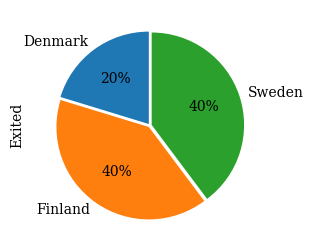

In [11]:
# Taken from https://www.geeksforgeeks.org/how-to-create-pie-chart-from-pandas-dataframe/
# and https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html

# Defining colors for the pie chart
#colors = ['pink', 'silver', 'steelblue']
  
# Define the ratio of gap of each fragment in a tuple
explode = (0.02, 0.02, 0.02)

dataset.groupby(['Geography']).sum().plot(kind='pie', y='Exited', autopct='%1.0f%%', #colors=colors
                                       startangle=90, figsize=(3, 3), explode=explode, legend=None)
plt.show()

Let's clone the dataset and work on the numerical features first. Since `Gender` and `Geography` may impact customer's decisions to churn, let's represent them in numbers so thay can be included in the training. The following features are excluded since they do not bring in any valuable information in this case: `RowNumber`, `CustomerId` and `Surname`. 

In [12]:
# make a copy of the dataset
data = pd.DataFrame(dataset)

In [13]:
data = data.replace('Female', 0)
data = data.replace('Male', 1)

data = data.replace('Sweden', 1)
data = data.replace('Denmark', 2)
data = data.replace('Finland', 3)

In [14]:
# we work on 'data' from here on
# drop all non-numerical feature(s)
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [15]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


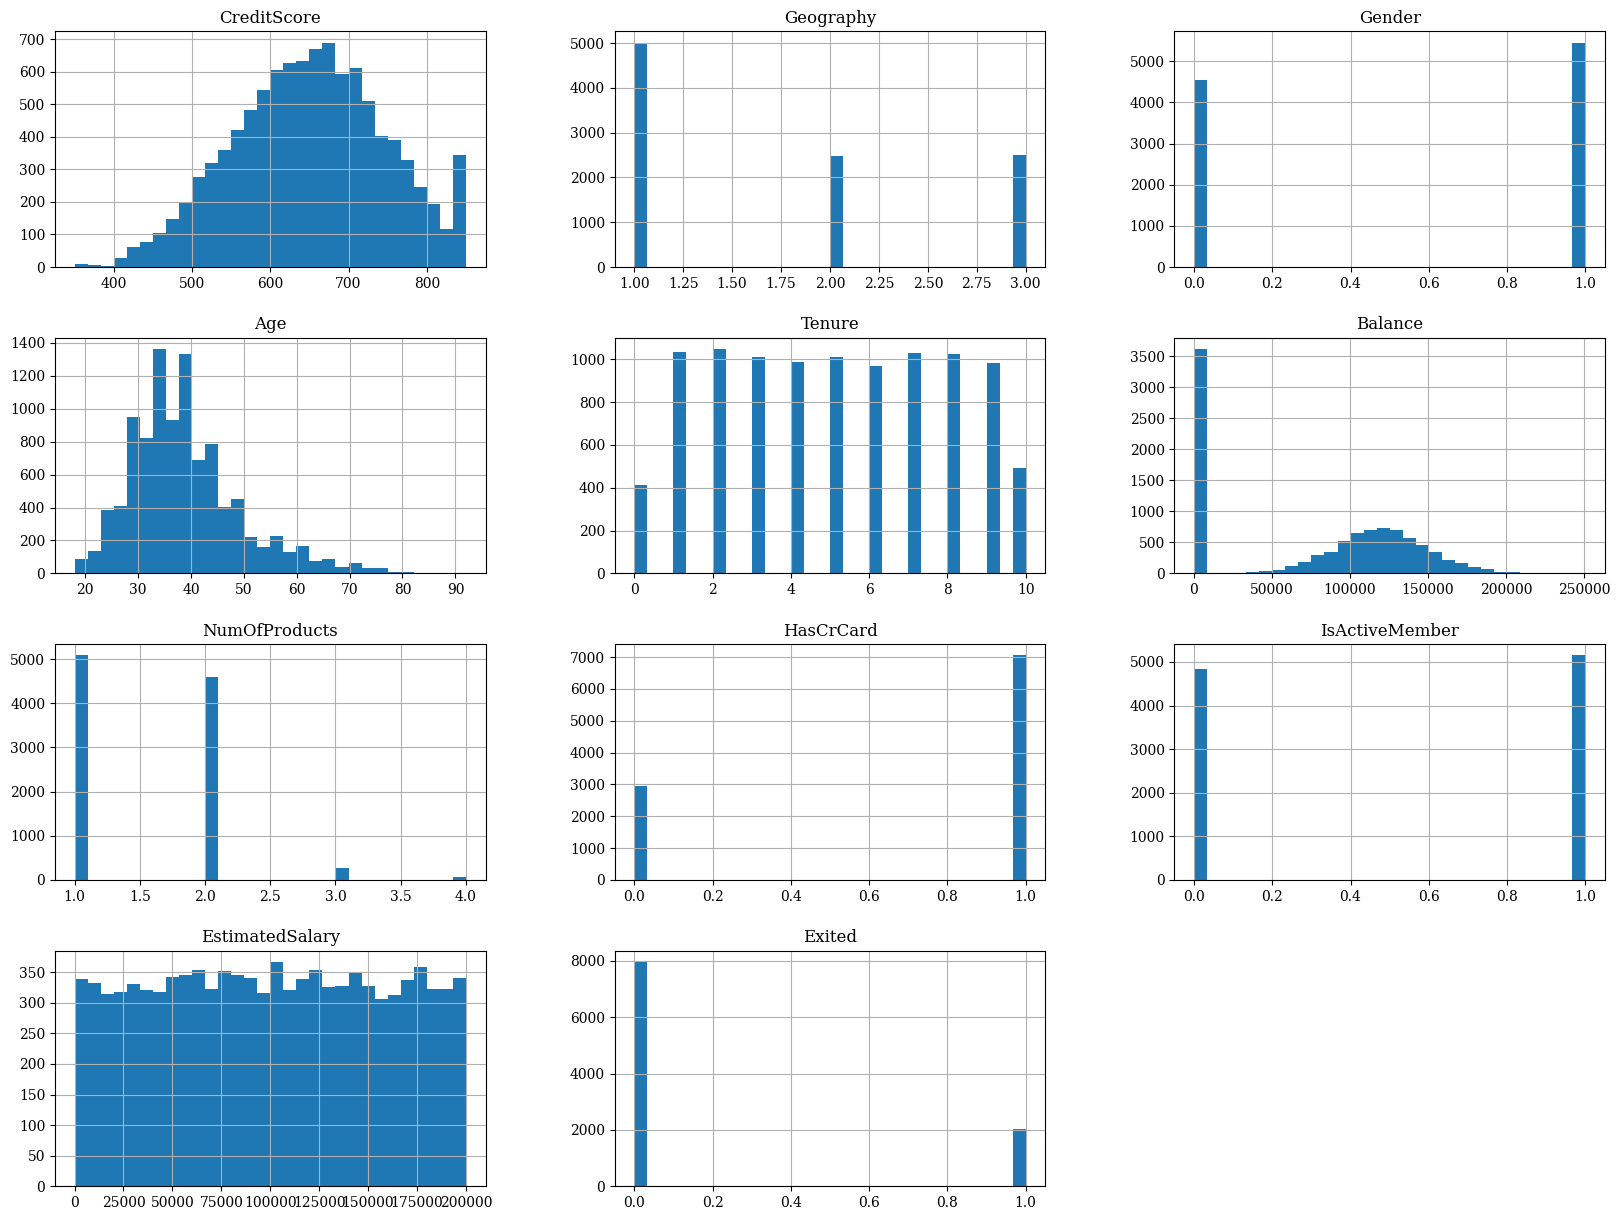

In [16]:
# plot histograms of all features
data.hist(bins=30, figsize=(20,15))
plt.show()

<AxesSubplot: xlabel='Balance', ylabel='Age'>

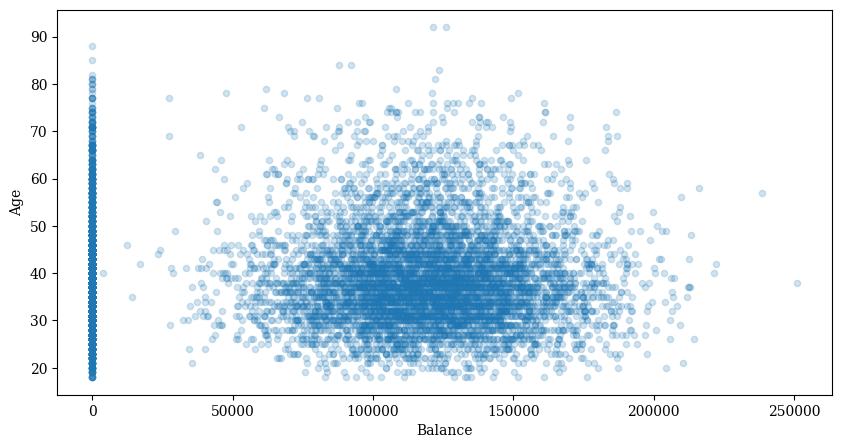

In [17]:
data.plot(kind='scatter', x='Balance', y='Age', alpha=0.2, figsize=(10, 5))

In [18]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [19]:
# make dataframes of exited and remaining customers
exit   = data[data['Exited']==1]
remain = data[data['Exited']==0]

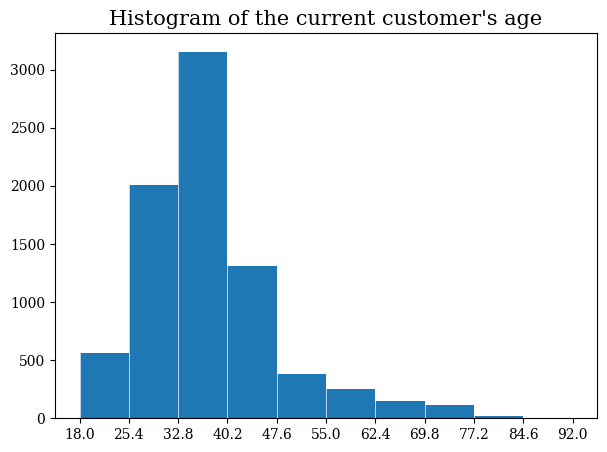

In [20]:
fig = plt.figure(figsize=(7,5))
n, bins, patches = plt.hist(remain['Age'])
plt.xticks(bins)
plt.grid(color='white', lw = 0.5, axis='x')
plt.title("Histogram of the current customer's age", fontsize = 15)
plt.show()

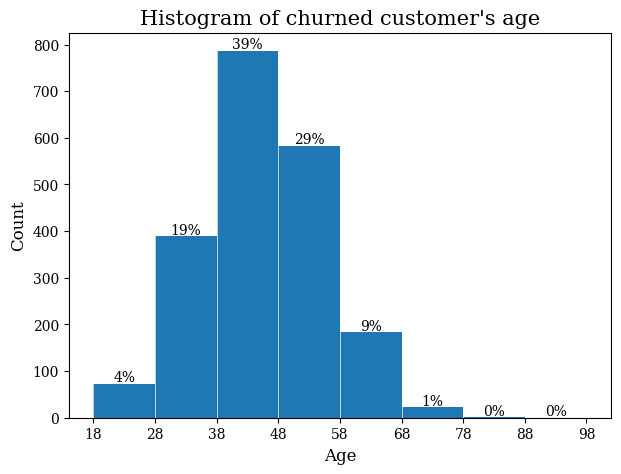

In [21]:
    fig = plt.figure(figsize=(7,5))
    xbins = [18, 28, 38, 48, 58, 68, 78, 88, 98]
    hist, bins, patches = plt.hist(exit['Age'], bins=xbins)
    plt.xticks(xbins)
    plt.grid(color='white', lw = 0.5, axis='x')
    plt.title("Histogram of churned customer's age", fontsize = 15)
    plt.xlabel('Age', fontsize = 12)
    plt.ylabel('Count', fontsize = 12)
    # print numbers on hist 
    n = 0
    for i in hist:
        n = n + i
    for idx, value in enumerate(hist): 
        plt.text(xbins[idx]+5, value+5, str(round(value*100/n))+'%', ha='center')

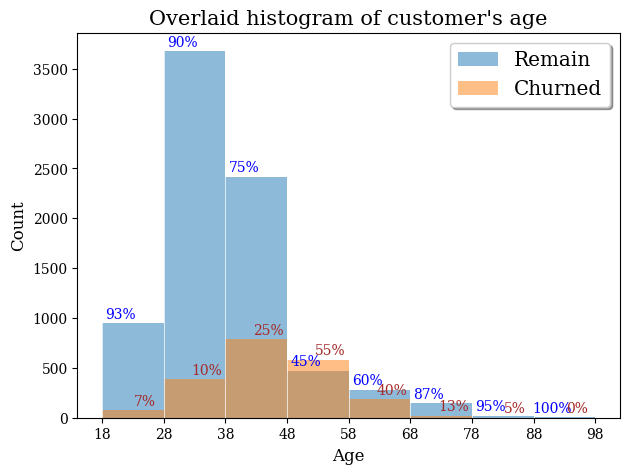

In [22]:
fig = plt.figure(figsize=(7,5))
xticks = [18, 28, 38, 48, 58, 68, 78, 88, 98]
#bins5 = [18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73, 78, 83, 88]
n1, bins1, patches = plt.hist(remain['Age'], alpha=0.5, bins=xticks, label='Remain')
n2, bins2, patches = plt.hist(exit['Age'], alpha=0.5, bins=xticks, label='Churned')
plt.xticks(bins1)
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.grid(color='white', lw = 0.5, axis='x')
plt.title("Overlaid histogram of customer's age", fontsize = 15)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

# plot values on top of bars
for idx, value in enumerate(n1):
    plt.text(xticks[idx]+3, value+50, str(round(n1[idx]*100/(n1[idx]+n2[idx])))+'%', ha='center', color='blue')

for idx, value in enumerate(n2):
    plt.text(xticks[idx]+7, value+50, str(round(n2[idx]*100/(n1[idx]+n2[idx])))+'%', ha='center', color='brown')
        
plt.savefig('age_pct_hist.png', dpi=300)
plt.show()

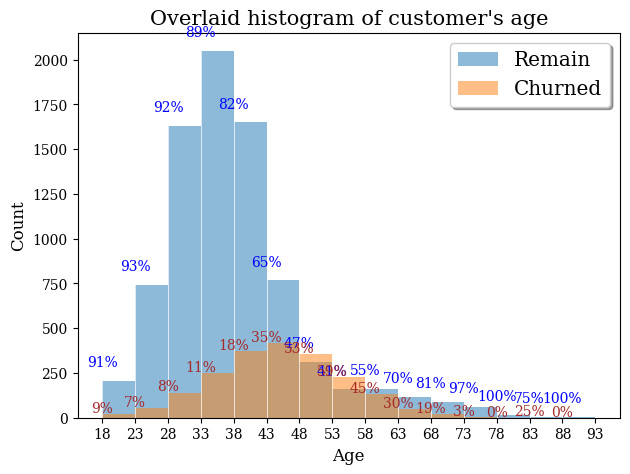

In [23]:
fig = plt.figure(figsize=(7,5))
xticks = [18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73, 78, 83, 88, 93]
n1, bins1, patches = plt.hist(remain['Age'], alpha=0.5, bins=xticks, label='Remain')
n2, bins2, patches = plt.hist(exit['Age'], alpha=0.5, bins=xticks, label='Churned')
plt.xticks(bins1)
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.grid(color='white', lw = 0.5, axis='x')
plt.title("Overlaid histogram of customer's age", fontsize = 15)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

# plot values on top of bars
for idx, value in enumerate(n1):
    plt.text(xticks[idx], value+80, str(round(n1[idx]*100/(n1[idx]+n2[idx])))+'%', ha='center', color='blue')

for idx, value in enumerate(n2):
    plt.text(xticks[idx], value+10, str(round(n2[idx]*100/(n1[idx]+n2[idx])))+'%', ha='center', color='brown')
        
plt.savefig('age_pct_hist_10bins.png', dpi=300)
plt.show()

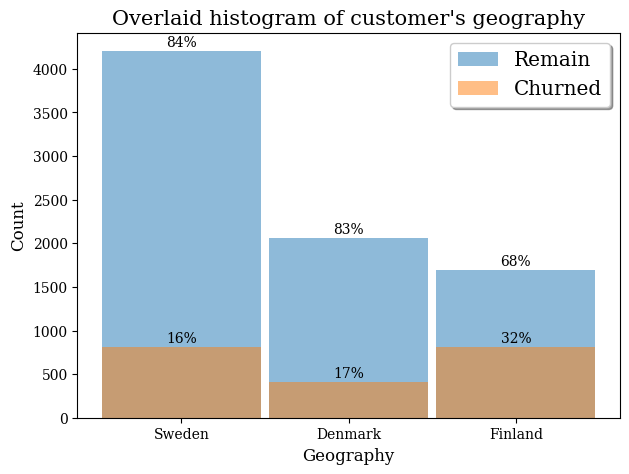

In [24]:
fig = plt.figure(figsize=(7,5))
binning = np.arange(4) + 0.5
n1, bins1, patches = plt.hist(remain['Geography'], alpha=0.5, label='Remain', bins=binning, rwidth=0.95)
n2, bins2, patches = plt.hist(exit['Geography'], alpha=0.5, label='Churned', bins=binning, rwidth=0.95)
#plt.xticks(range(4))
xticks = [1, 2, 3]
xticks_labels = ['Sweden', 'Denmark', 'Finland']
plt.xticks(xticks, labels = xticks_labels)
#ax.tick_params(axis='x', which='both',length=0)
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.title("Overlaid histogram of customer's geography", fontsize = 15)
plt.xlabel('Geography', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

# plot values on top of bars
for idx, value in enumerate(n1):
    if value > 0:
        plt.text(xticks[idx], value+50, str(round(n1[idx]*100/(n1[idx]+n2[idx])))+'%', ha='center')

for idx, value in enumerate(n2):
    if value > 0:
        plt.text(xticks[idx], value+50, str(round(n2[idx]*100/(n1[idx]+n2[idx])))+'%', ha='center')

plt.savefig('geo_pct_hist.png', dpi=300)
plt.show()

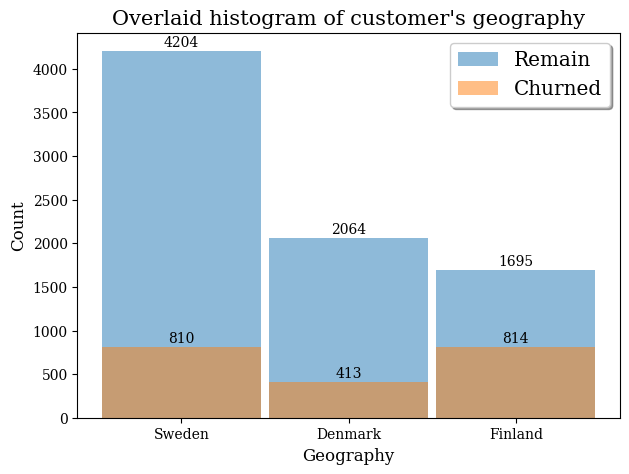

In [25]:
fig = plt.figure(figsize=(7,5))
binning = np.arange(4) + 0.5
n1, bins1, patches = plt.hist(remain['Geography'], alpha=0.5, label='Remain', bins=binning, rwidth=0.95)
n2, bins2, patches = plt.hist(exit['Geography'], alpha=0.5, label='Churned', bins=binning, rwidth=0.95)
#plt.xticks(range(4))
xticks = [1, 2, 3]
xticks_labels = ['Sweden', 'Denmark', 'Finland']
plt.xticks(xticks, labels = xticks_labels)
#ax.tick_params(axis='x', which='both',length=0)
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.title("Overlaid histogram of customer's geography", fontsize = 15)
plt.xlabel('Geography', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

# plot values on top of bars
for idx, value in enumerate(n1):
    if value > 0:
        plt.text(xticks[idx], value+50, int(value), ha='center')

for idx, value in enumerate(n2):
    if value > 0:
        plt.text(xticks[idx], value+50, int(value), ha='center')

plt.savefig('geo_hist.png', dpi=300)
plt.show()

In [26]:
810*100/(810+413+814) # of all people churn, 40% in sweden

39.76435935198822

In [27]:
810*100/(4204+810) # of all people in sweden, 16% churned

16.15476665337056

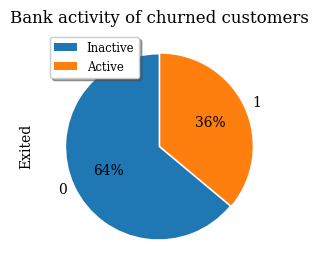

In [28]:
labels=["Inactive", "Active"]
explode = (0.01, 0.01)
data.groupby(['IsActiveMember']).sum().plot(kind='pie', y='Exited', autopct='%1.0f%%', #colors=colors,
                                       explode=explode, startangle=90, figsize=(3, 3))
legend = plt.legend(labels, shadow=True, fontsize='small')
plt.title('Bank activity of churned customers')
plt.savefig('churn_activity_pie.png', dpi=300)
plt.show()

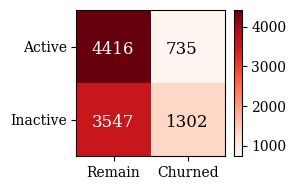

In [29]:
plt.rcParams["figure.figsize"] = [3,2]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
hist, xbins, ybins, im = ax.hist2d(x=data['Exited'], y=data['IsActiveMember'], bins = [2,2], cmap='Reds')
fig.colorbar(im, ax=ax)
xticks = [0.25, 0.75]
xticks_labels = ['Remain', 'Churned']
plt.xticks(xticks, labels = xticks_labels)
#ax.tick_params(axis='x', which='both',length=0)

yticks = [0.25, 0.75]
yticks_labels = ['Inactive', 'Active']
plt.yticks(yticks, labels = yticks_labels)

#plt.ylabel('Active member')
my_color = 'w'
for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        if j==1: my_color='black'
        else: my_color = 'w'
        ax.text(xbins[j]+0.1,ybins[i]+0.2, hist.T[i,j].astype(int), color=my_color, size='large')
        
plt.show()

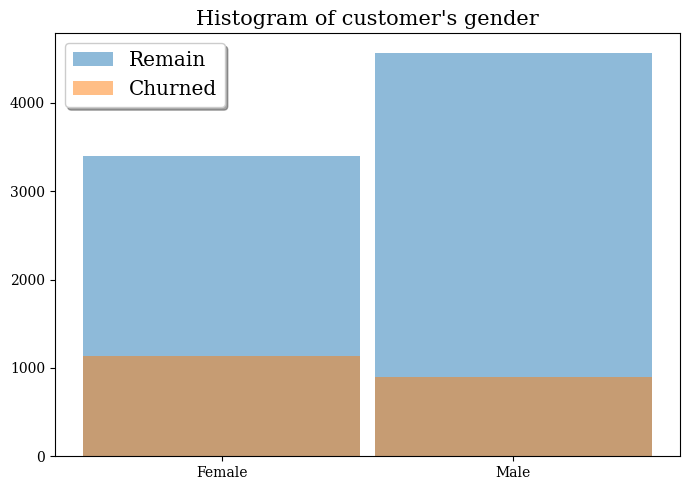

In [30]:
fig = plt.figure(figsize=(7,5))
binning = np.arange(3) 
n, bins1, patches = plt.hist(remain['Gender'], alpha=0.5, label='Remain', bins=binning, rwidth=0.95)
n, bins2, patches = plt.hist(exit['Gender'], alpha=0.5, label='Churned', bins=binning, rwidth=0.95)
#plt.xticks(range(4))
xticks = [0.5, 1.5]
xticks_labels = ['Female', 'Male']
plt.xticks(xticks, labels = xticks_labels)
#ax.tick_params(axis='x', which='both',length=0)
legend = plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.title("Histogram of customer's gender", fontsize = 15)
plt.show()

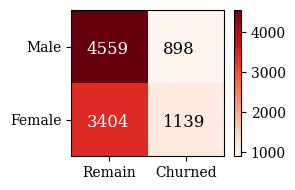

In [31]:
plt.rcParams["figure.figsize"] = [3,2]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
hist, xbins, ybins, im = ax.hist2d(x=data['Exited'], y=data['Gender'], bins = [2,2], cmap='Reds')
fig.colorbar(im, ax=ax)
xticks = [0.25, 0.75]
xticks_labels = ['Remain', 'Churned']
plt.xticks(xticks, labels = xticks_labels)
#ax.tick_params(axis='x', which='both',length=0)

yticks = [0.25, 0.75]
yticks_labels = ['Female', 'Male']
plt.yticks(yticks, labels = yticks_labels)

#plt.ylabel('Active member')
my_color = 'w'
for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        if j==1: my_color='black'
        else: my_color = 'w'
        ax.text(xbins[j]+0.1,ybins[i]+0.2, hist.T[i,j].astype(int), color=my_color, size='large')
        
plt.show()

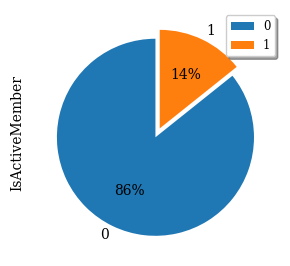

In [32]:
explode = (0.05, 0.05)
data.groupby(['Exited']).sum().plot(kind='pie', y='IsActiveMember', autopct='%1.0f%%', #colors=colors,
                                       startangle=90, explode=explode, figsize=(3, 3))
legend = plt.legend(loc='upper right', shadow=True, fontsize='small')
plt.show()

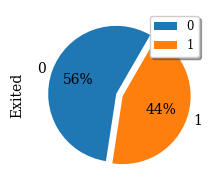

In [33]:
explode = (0.05, 0.05)
data.groupby(['Gender']).sum().plot(kind='pie', y='Exited', autopct='%1.0f%%',
  startangle=60, explode=explode)
legend = plt.legend(loc='upper right', shadow=True, fontsize='small')

In [34]:
a = data.groupby(['Exited'])
a.sum()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,
0,5190707,13417,4559,297883,40080,5.792708e+08,12297,5631,4416,7.942168e+08
1,1314581,4078,898,91335,10048,1.855881e+08,3005,1424,735,2.066856e+08


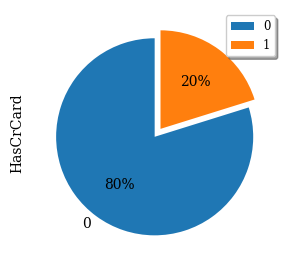

In [35]:
explode = (0.05, 0.05)
data.groupby(['Exited']).sum().plot(kind='pie', y='HasCrCard', autopct='%1.0f%%', #colors=colors,
                                       startangle=90, explode=explode, figsize=(3, 3))
legend = plt.legend(loc='upper right', shadow=True, fontsize='small')
plt.show()

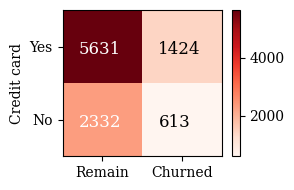

In [36]:
plt.rcParams["figure.figsize"] = [3,2]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
hist, xbins, ybins, im = ax.hist2d(x=data['Exited'], y=data['HasCrCard'], bins = [2,2], cmap='Reds')
fig.colorbar(im, ax=ax)
xticks = [0.25, 0.75]
xticks_labels = ['Remain', 'Churned']
plt.xticks(xticks, labels = xticks_labels)
#ax.tick_params(axis='x', which='both',length=0)

yticks = [0.25, 0.75]
yticks_labels = ['No', 'Yes']
plt.yticks(yticks, labels = yticks_labels)

plt.ylabel('Credit card')
my_color = 'w'
for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        if j==1: my_color='black'
        else: my_color = 'w'
        ax.text(xbins[j]+0.1,ybins[i]+0.2, hist.T[i,j].astype(int), color=my_color, size='large')
        
plt.show()

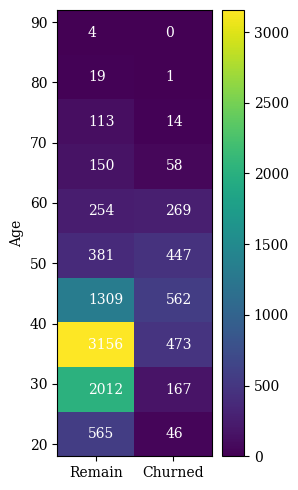

In [37]:
plt.rcParams["figure.figsize"] = [3, 5]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
hist, xbins, ybins, im = ax.hist2d(x=data['Exited'], y=data['Age'], bins = [2,10])#, cmap='gist_rainbow')
fig.colorbar(im, ax=ax)
xticks = [0.25, 0.75]
xticks_labels = ['Remain', 'Churned']
plt.xticks(xticks, labels = xticks_labels)
#ax.tick_params(axis='x', which='both',length=0)

my_color = 'w'
for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        ax.text(xbins[j]+0.2,ybins[i]+3, hist.T[i,j].astype(int), color=my_color, size='medium')#, va='center', ha='center')
        
plt.ylabel('Age')
plt.show()

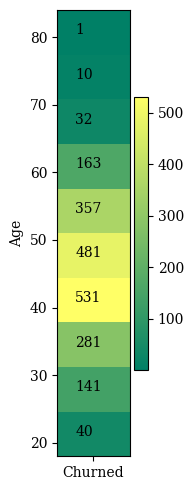

In [38]:
#plt.hist2d(data['Age'],data['Exited'], bins = [10,2], annot=True)#, figsize=(5,5), alpha=0.1)
#plt.show()

plt.rcParams["figure.figsize"] = [2, 5]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
hist, xbins, ybins, im = ax.hist2d(x=exit['Exited'], y=exit['Age'], bins = [1,10], cmap='summer')
fig.colorbar(im, ax=ax)

xticks = [1.0]
xticks_labels = ['Churned']
plt.xticks(xticks, labels = xticks_labels)
#ax.tick_params(axis='x', which='both',length=0)
my_color = 'black'
for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        ax.text(xbins[j]+0.25,ybins[i]+3, hist.T[i,j].astype(int), color=my_color, size='medium')#, va='center', ha='center')
plt.ylabel('Age')
plt.show()

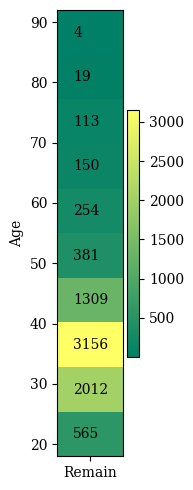

In [39]:
#plt.hist2d(data['Age'],data['Exited'], bins = [10,2], annot=True)#, figsize=(5,5), alpha=0.1)
#plt.show()

plt.rcParams["figure.figsize"] = [2, 5]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
hist, xbins, ybins, im = ax.hist2d(x=remain['Exited'], y=remain['Age'], bins = [1,10], cmap='summer')
fig.colorbar(im, ax=ax)

xticks = [0.0]
xticks_labels = ['Remain']
plt.xticks(xticks, labels = xticks_labels)
#ax.tick_params(axis='x', which='both',length=0)
my_color = 'black'
for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        ax.text(xbins[j]+0.25,ybins[i]+3, hist.T[i,j].astype(int), color=my_color, size='medium')#, va='center', ha='center')
#plt.xlabel('Exited')
plt.ylabel('Age')
plt.show()

In [40]:
print(data['Age'].min(), data['Age'].max())

18 92


In [41]:
print(data['EstimatedSalary'].min(), data['EstimatedSalary'].max())

11.58 199992.48


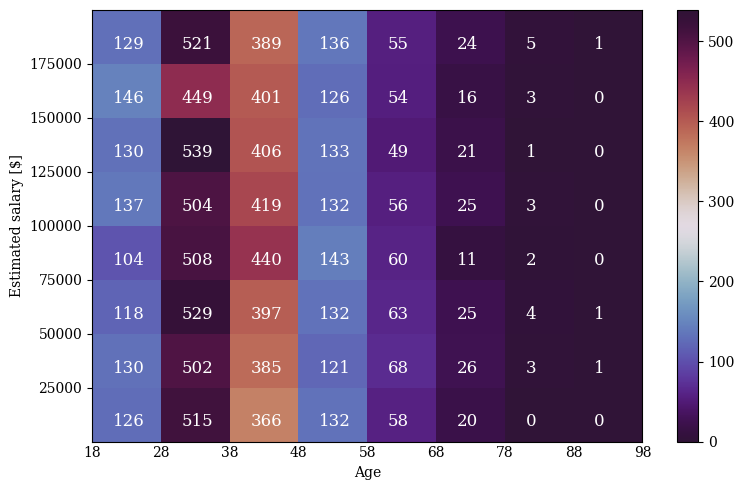

In [42]:
bins10 = [18, 28, 38, 48, 58, 68, 78, 88, 98]
bins5 = [18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73, 78, 83, 88]
ybins = 8
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
hist, xbins, ybins, im = ax.hist2d(x=data['Age'], y=data['EstimatedSalary'],  bins = [bins10, ybins], cmap='twilight_shifted')
fig.colorbar(im, ax=ax)
xticks = bins10
xticks_labels = bins10 #['Remain', 'Churned']
plt.xticks(xticks, labels = xticks_labels)
ax.tick_params(axis='x', which='both',length=0)
plt.xlabel('Age')
plt.ylabel('Estimated salary [$]')

for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        ax.text(xbins[j]+3,ybins[i]+7000, hist.T[i,j].astype(int), color="w", size='large')
plt.savefig('heatmap_salaryVSage.png', dpi=300)
plt.show()

In [43]:
print(data['Balance'].min(), data['Balance'].max())

0.0 250898.09


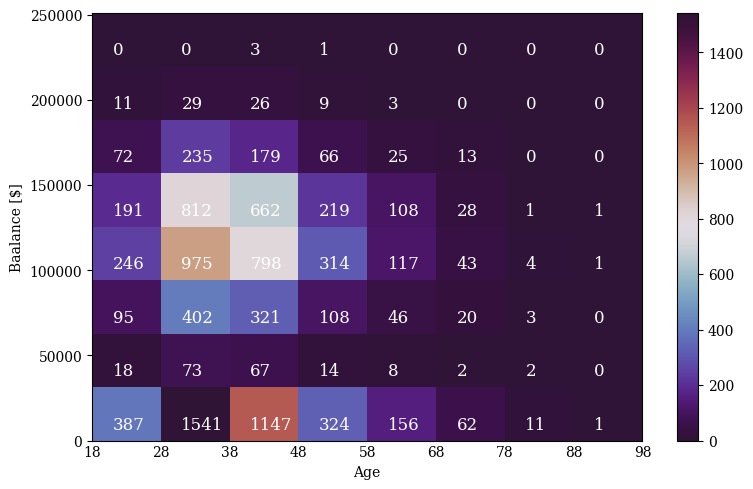

In [44]:
ybins = 8
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
hist, xbins, ybins, im = ax.hist2d(x=data['Age'], y=data['Balance'],  bins = [bins10, ybins], cmap='twilight_shifted')
fig.colorbar(im, ax=ax)
xticks = bins10
xticks_labels = bins10 #['Remain', 'Churned']
plt.xticks(xticks, labels = xticks_labels)
ax.tick_params(axis='x', which='both',length=0)
plt.xlabel('Age')
plt.ylabel('Baalance [$]')

for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        ax.text(xbins[j]+3,ybins[i]+7000, hist.T[i,j].astype(int), color="w", size='large')
        
plt.show()

In [45]:
# show the NaN entries
data[data.isnull().any(axis=1)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [46]:
data.dropna(inplace=True)

In [47]:
data[data.isnull().any(axis=1)]
# this should show no entires with NaN

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


### Data correlation
The corelation of features is inspected. This is done by plotting a correlation matrix of all numerical features. Note that if there are non-numerical parameters in the dataset, the numerical parameters will still be automatically selected to make this matrix.

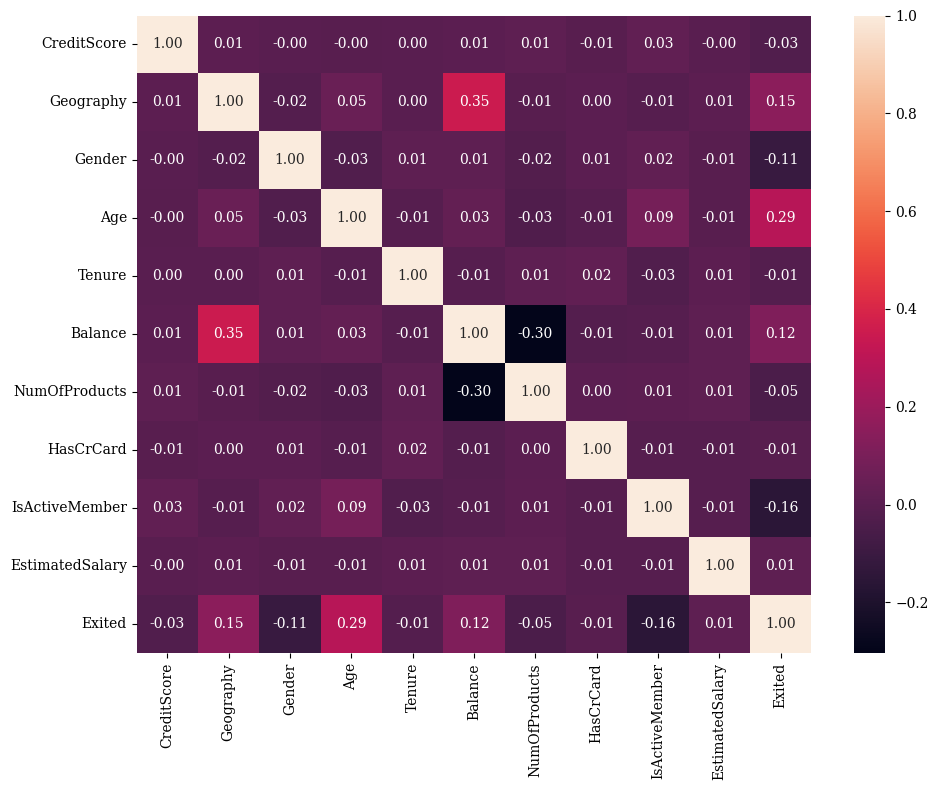

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, fmt='.2f')#, cmap='seismic')
plt.savefig('heatmap_all.png', dpi=300)
plt.show()

No strong correlation. Using all the features above. 

## Training

In [49]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [50]:
# splitting data for training
X = data.drop(['Exited'], axis=1)
Y = data['Exited']

# 80% of data for training and 20% for testing 
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=4)

In [80]:
def training_output(model):
    fpr_te, tpr_te, threshold_te = metrics.roc_curve(y_test.to_numpy(), model.predict(x_test))
    fpr_tr, tpr_tr, threshold_tr = metrics.roc_curve(y_train.to_numpy(), model.predict(x_train))
    
    print("score on test: " + str(model.score(x_test, y_test)))
    print("score on train: "+ str(model.score(x_train, y_train)))
    print("AUC test: ", metrics.auc(fpr_te, tpr_te))
    print("AUC train: ", metrics.auc(fpr_tr, tpr_tr))
    
    fig = plt.figure(figsize=(5,3))
    plt.plot(fpr_te, tpr_te, label='test')
    plt.plot(fpr_tr, tpr_tr, label='train')
    legend = plt.legend(loc='upper left')
    plt.xlabel('FP')
    plt.ylabel('TP')
    plt.show()

    #return(fpr_te, tpr_te, fpr_tr, tpr_tr)

score on test: 0.542
score on train: 0.55575
AUC test:  0.5280863497821104
AUC train:  0.5534925859494271


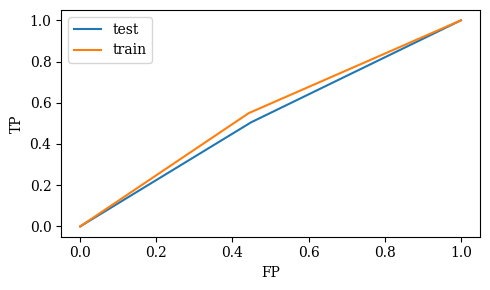

In [81]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB().fit(x_train, y_train)
training_output(mnb)

score on test: 0.799
score on train: 0.78825
AUC test:  0.5228532204841432
AUC train:  0.5150480794708714


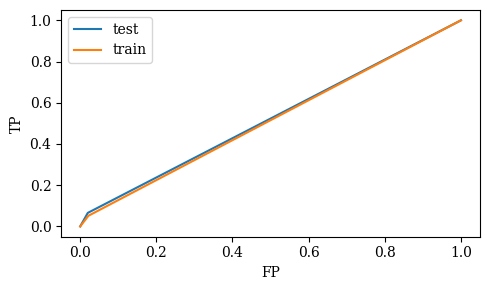

In [82]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
training_output(lr)


score on test: 0.765
score on train: 0.817
AUC test:  0.505459835260334
AUC train:  0.6038905737442956


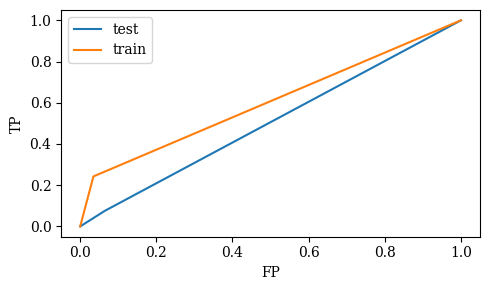

In [83]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() #(algorithm = 'brute', n_jobs=-1)
knn.fit(x_train, y_train)
training_output(knn)

C:\Users\Connor\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


score on test: 0.8015
score on train: 0.794125
AUC test:  0.5034919015592333
AUC train:  0.5020149267104668


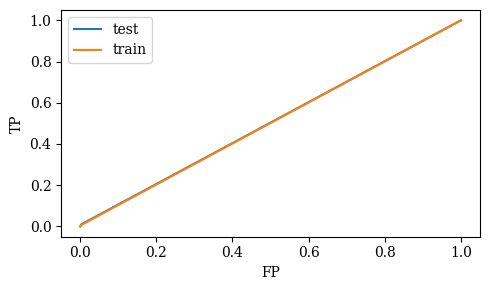

In [84]:
from sklearn.svm import LinearSVC

svm = LinearSVC(C=0.0001)
svm.fit(x_train, y_train)
training_output(svm)

score on test: 0.7845
score on train: 1.0
AUC test:  0.687829038514824
AUC train:  1.0


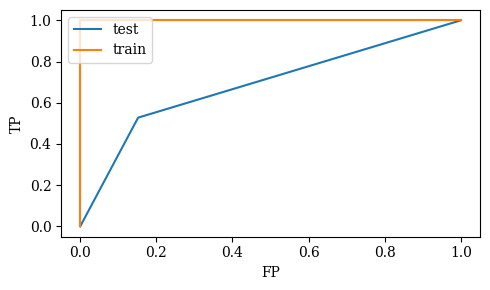

In [85]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
training_output(clf)

score on test: 0.8725
score on train: 0.888125
AUC test:  0.7198701478626666
AUC train:  0.7451594466723379


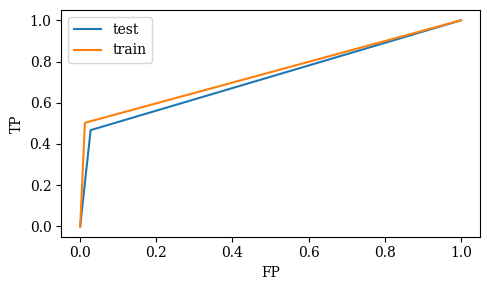

In [86]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(x_train, y_train)
training_output(rf)

score on test: 0.34807992644651
score on train: 0.9042745559490026
AUC test:  0.8550246857603467
AUC train:  1.0


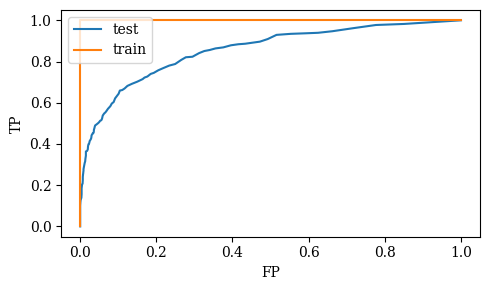

In [93]:
model_RF = RandomForestRegressor()
model_RF.fit(x_train, y_train)
training_output(model_RF)

score on test: 0.802
score on train: 0.794875
AUC test:  0.5
AUC train:  0.5


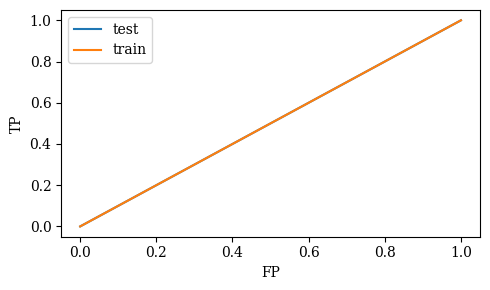

In [89]:
from sklearn import svm

svc = svm.SVC()
svc.fit(x_train, y_train)
training_output(svc)

score on test: 0.14962564371775033
score on train: 0.14598006933124952
AUC test:  0.7713827804226807
AUC train:  0.7660642873358703


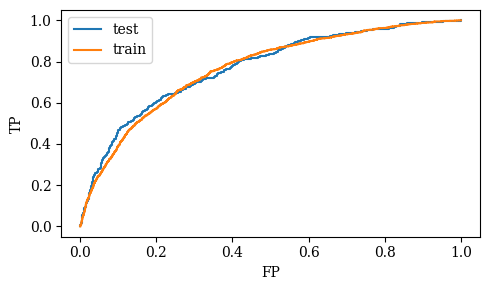

In [90]:
model_LR = LinearRegression()  
model_LR.fit(x_train, y_train)
training_output(model_LR)

score on test: 0.799
score on train: 0.78825
AUC test:  0.5228532204841432
AUC train:  0.5150480794708714


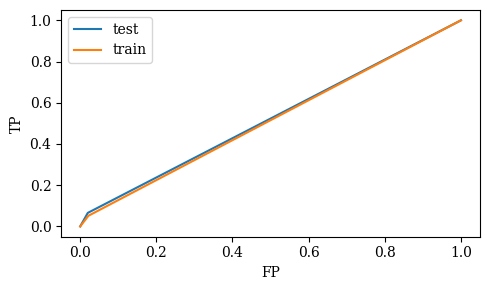

In [91]:
from sklearn.linear_model import LogisticRegression

model_LoR = LogisticRegression()
model_LoR.fit(x_train, y_train)
training_output(model_LoR)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor(max_depth=2)
regr.fit(x_train, y_train)
training_output(regr)